# Projek Zyfra

# Daftar Isi <a id='daftar_isi'></a>

* [Pendahuluan](#project_intro)
* [Tahap 1. Persiapan Data](#data_review)
    * [1.1 Pilah data](#separate_data)
    * [1.2 Tanpa cek keseimbangan kelas](#without_balance)
    * [1.3 Dengan cek keseimbangan kelas](#with_balance)
* [Tahap 2. Model Training, Validation, & Testing](#model_training)
    * [2.1 Decision Tree](#decision_tree)
        * [2.1.a Decision Tree (tanpa cek kelas)](#dt_no_class_check)
        * [2.1.b Decision Tree (downsampling)](#dt_downsampling)
        * [2.1.c Decision Tree (upsampling)](#dt_upsampling)
        * [Rangkuman Decision Tree](#dt_summary)      
    * [2.2 Logistic Regression](#logistic_regression)
        * [2.2.a Logistic Regression (tanpa cek kelas)](#lr_no_class_check)
        * [2.2.b Logistic Regression (downsampling)](#lr_downsampling)
        * [2.2.c Logistic Regression (upsampling)](#lr_upsampling)
        * [Rangkuman Logistic Regression](#lr_summary)      
    * [2.3 Random Forest](#random_forest)
        * [2.3.a Logistic Regression (tanpa cek kelas)](#rf_no_class_check)
        * [2.3.b Logistic Regression (downsampling)](#rf_downsampling)
        * [2.3.c Logistic Regression (upsampling)](#rf_upsampling)
        * [Rangkuman Random Forest](#rf_summary)    
* [Tahap 3. Kesimpulan](#summary)

## Pendahuluan <a id='project_intro'></a>

Zyfra adalah perusahaan yg menyediakan solusi digital untuk meningkatkan efisiensi & keamanan di industri pertambangan, minyak & gas, kimia, dll. Solusi industri yg dimiliki Zyfra dibangun berdasarkan platform yg berbasis IoT. Dengan pendekatan ini setiap titik proses bisa diamati/dimonitor secara realtime & data2 yg dikumpulkan dapat digunakan untuk memperbaiki efisiensi proses2 tadi.

### Tujuan: 
Tujuan projek ini adalah untuk mengembangkan sebuah model machine learning untuk menciptakan proses produksi emas yg lebih efisien dan memprediksi jumlah emas yang diekstraksi atau diperoleh dari bijih emas (Au).

### Tahapan
Karena jenis kasusnya adalah Supervised Learning - Classification, kita akan menggunakan dan membandingkan model2 pembelajaran berikut ini:
- Decision Tree
- Logistic Regression
- Random Forest

Di setiap model diatas akan dilakukan 3 tahapan yaitu training, validation, & testing. Dan pada tiap tahapan data akan dipisahkan sesuai peruntukannya masing2.

Dataset yg disiapkan terbagi menjadi 3 jenis :
- Dataset yg mengabaikan ketidakseimbangan kelas
- Dataset yg memperbaiki ketidakseimbangan lewat proses Downsampling
- Dataset yg memperbaiki ketidakseimbangan lewat proses Upsampling

Ketiga jenis dataset diatas akan diterapkan pada proses pembelajaran di masing2 model.




[[Kembali ke Daftar Isi]](#daftar_isi)

## 1. Persiapan Data <a id='data_review'></a>

In [1]:
# Impor semua library yg dibutuhkan

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Baca file data sumber

try:
    df_train = pd.read_csv('gold_recovery_train.csv')
    df_test = pd.read_csv('gold_recovery_test.csv')
    df_full = pd.read_csv('gold_recovery_full.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Lihat strukturnya

print(df_full.shape)
print(df_train.shape)
print(df_test.shape)


(22716, 87)
(16860, 87)
(5856, 53)


In [5]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
#df_train['final.output.concentrate_ag'].sum()

In [7]:
df_full.info()
print(df_train.info())
#print(df_test.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


array([[<AxesSubplot: title={'center': 'rougher.input.feed_au'}>,
        <AxesSubplot: title={'center': 'rougher.output.tail_au'}>,
        <AxesSubplot: title={'center': 'rougher.output.concentrate_au'}>],
       [<AxesSubplot: title={'center': 'primary_cleaner.output.tail_au'}>,
        <AxesSubplot: title={'center': 'primary_cleaner.output.concentrate_au'}>,
        <AxesSubplot: title={'center': 'secondary_cleaner.output.tail_au'}>],
       [<AxesSubplot: title={'center': 'final.output.tail_au'}>,
        <AxesSubplot: title={'center': 'final.output.concentrate_au'}>,
        <AxesSubplot: title={'center': 'rougher.output.recovery'}>],
       [<AxesSubplot: title={'center': 'final.output.recovery'}>,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

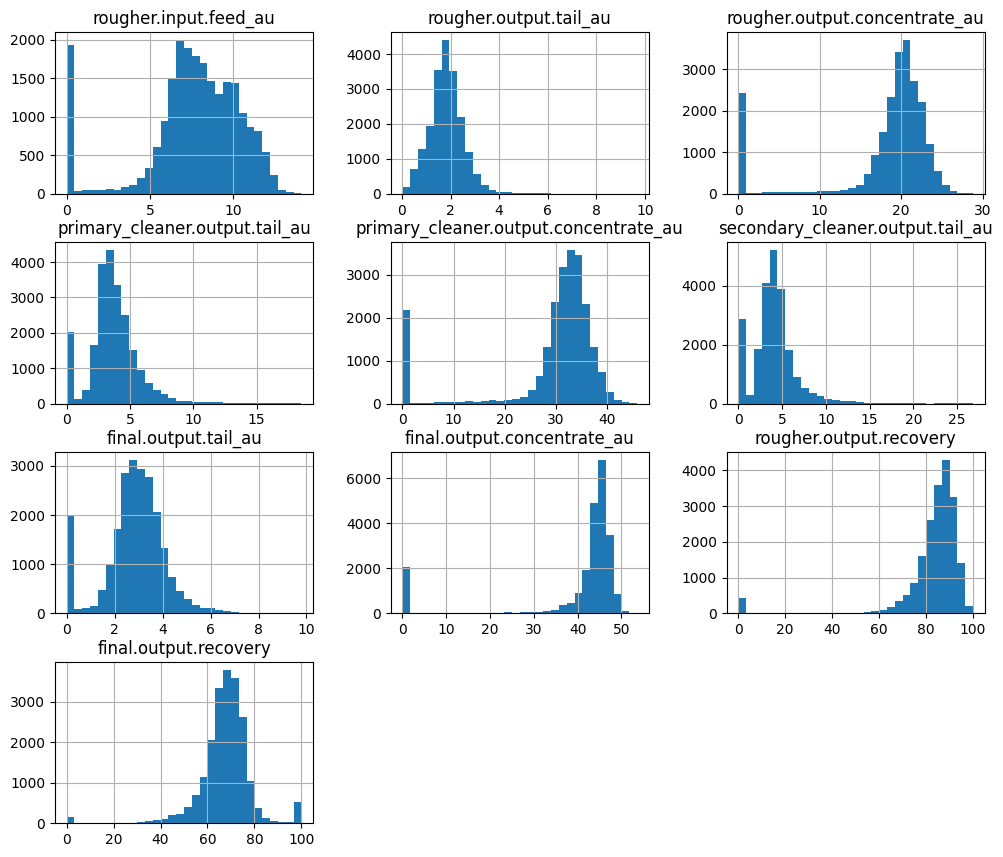

In [8]:
process_steps = ['rougher.input.feed_au', 
                 'rougher.output.tail_au',
                'rougher.output.concentrate_au',
                'primary_cleaner.output.tail_au',
                'primary_cleaner.output.concentrate_au',
                'secondary_cleaner.output.tail_au',
                'final.output.tail_au',
                'final.output.concentrate_au',
                'rougher.output.recovery',
                'final.output.recovery']
df_full.hist(column=process_steps, bins=30, figsize=(12,13), layout=(5,3))

In [9]:
#df_full.compare(df_test)
#~df['col_name'].isin(values_list)
#df_test.merge(df_full[not in (list(df_test.columns))], on='date', how='left').shape
#set(list(df_full.columns)) - set(list(df_test.columns))
qqq = list(set(df_full.columns) - set(df_test.columns))
qqq.append("date")
qqq
df_test1 = df_test.merge(df_full[qqq], on='date', how='left')


In [10]:
df_test1['rougher.output.tail_au'].describe()

count    5369.000000
mean        1.977029
std         0.558166
min         0.593821
25%         1.618526
50%         1.916564
75%         2.281086
max         8.253282
Name: rougher.output.tail_au, dtype: float64

In [11]:
df_test1['rougher.output.tail_au'].tail(20)

5836    1.407681
5837    1.450549
5838    1.453671
5839    1.445815
5840    1.399261
5841    1.365220
5842    1.327629
5843    1.372233
5844    1.309850
5845    1.273667
5846    1.364335
5847    1.517564
5848    1.514079
5849    1.357231
5850    1.240068
5851    1.210968
5852    1.242229
5853    1.397920
5854    1.422450
5855    1.549391
Name: rougher.output.tail_au, dtype: float64

<AxesSubplot: >

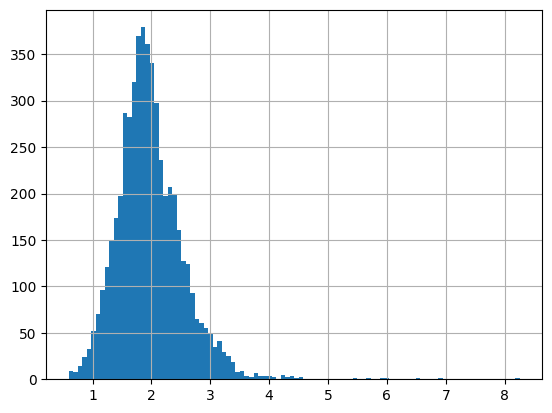

In [12]:
df_test1['rougher.output.tail_au'].hist(bins=100)

In [13]:
# Pisahkan feature & target di masing2 dataset
# Target : rougher.output.recovery & final.output.recovery


feature_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

feature_test = df_test.drop(['rougher.output.recovery'], axis=1)
target_test = df_test['rougher.output.recovery']


KeyError: "['Exited'] not found in axis"

In [ ]:
df_test1.hist(column=['rougher.output.recovery',
                'final.output.recovery'])

In [ ]:
# target : rougher.output.recovery & final.output.recovery
df_test1[['rougher.output.recovery',
                'final.output.recovery']].describe()

In [ ]:
df_test1.columns

In [15]:
x = np.arange(0,11)
#fig = plt.figure()
#ax = fig.add_axes([0,0,0.75,0.75])
#ax.plot(x, x**2, label="X^2")
#ax.plot(x, x**3, label="X^3")
#ax.legend(loc=0) #Let matplotlib decide